In [180]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [181]:
df = pd.read_csv('../data/Combined_QB.csv')  # Replace with your actual data
metric = 'Current_PFF'  # Specify the metric you want to predict

In [182]:
print(df.columns)

Index(['Unnamed: 0', 'Team', 'Year', 'Position', 'Value_cap_space',
       'Value_draft_data', 'Previous_AV', 'Current_AV', 'Previous_PFF',
       'Current_PFF', 'Total DVOA', 'win-loss-pct', 'Net EPA',
       'weighted_avg_accuracy_percent', 'weighted_avg_aimed_passes',
       'weighted_avg_attempts', 'weighted_avg_avg_depth_of_target',
       'weighted_avg_avg_time_to_throw', 'weighted_avg_bats',
       'weighted_avg_big_time_throws', 'weighted_avg_btt_rate',
       'weighted_avg_completion_percent', 'weighted_avg_completions',
       'weighted_avg_declined_penalties', 'weighted_avg_def_gen_pressures',
       'weighted_avg_drop_rate', 'weighted_avg_dropbacks',
       'weighted_avg_drops', 'weighted_avg_first_downs',
       'weighted_avg_franchise_id', 'weighted_avg_grades_hands_fumble',
       'weighted_avg_grades_pass', 'weighted_avg_grades_run',
       'weighted_avg_hit_as_threw', 'weighted_avg_interceptions',
       'weighted_avg_passing_snaps', 'weighted_avg_penalties',
       'w

In [183]:
columns_to_drop = ['Unnamed: 0']
df = df.drop(columns=columns_to_drop)


In [184]:
df = df.sort_values(by=['Team', 'Year'])

# Display the sorted data
print(df.head())


      Team  Year Position  Value_cap_space  Value_draft_data  Previous_AV  \
17   49ers  2019       QB        11.439957         24.060673         11.0   
50   49ers  2020       QB         0.610494         34.317120         15.0   
70   49ers  2021       QB        17.863014        528.923536         11.0   
123  49ers  2022       QB         6.959654        412.212335         15.0   
12   Bears  2019       QB         7.396387        434.985593         15.0   

     Current_AV  Previous_PFF  Current_PFF Total DVOA  ...  \
17         15.0     64.331406    77.900000     27.90%  ...   
50         11.0     77.900000    61.558114      5.40%  ...   
70         15.0     61.558114    72.551515     19.50%  ...   
123        17.0     72.551515    71.909475     27.60%  ...   
12          9.0     62.198104    64.653902     -2.10%  ...   

     Previous_sack_percent  Previous_sacks  Previous_scrambles  \
17                8.019063       16.592188            4.965625   
50                6.800000      

In [185]:
team_data = df.groupby('Team')
print(team_data.head)


<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x3799fa6f0>>


In [186]:
import numpy as np

sequences = []
targets = []

# Iterate over each team and its respective data
for team, group in team_data:
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][['Previous_twp_rate', 'Value_cap_space', 'Previous_AV', 'Previous_PFF', 
                                           'Previous_ypa', 'Previous_qb_rating', 'Previous_grades_pass', 
                                           'Previous_accuracy_percent', 'Previous_btt_rate']]  # Add more columns if needed
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['Current_PFF']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")


Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

In [187]:
# Check shape before reshaping
print(X)
print(X.shape)

# Reshape X to (samples, timesteps, features)
X = X.reshape(X.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(X.shape)  # Should now be (samples, 3, features)
print(X)

[[[  3.14234375  11.43995749  11.          64.33140625   7.97234375
    87.7428125   65.1784375   74.32578125   2.13875   ]
  [  3.4          0.61049445  15.          77.9          8.4
   102.          75.7         78.8          2.6       ]
  [  4.5137558   17.8630137   11.          61.55811437   7.5927357
    90.24605873  60.39690881  75.82952087   3.00850077]]

 [[  3.80300158   7.39638682  15.          62.19810427   7.31090047
    94.68720379  58.16319115  72.39494471   4.11879937]
  [  3.44566474   8.06760848   9.          64.65390173   6.17991329
    84.07037572  64.42196532  71.81921965   3.93973988]
  [  4.44748201   6.39452055  10.          64.11294964   6.37266187
    86.73453237  62.75971223  72.42374101   4.23309353]]

 [[  3.66574501   9.24017003  11.          71.89754224   6.5546851
    87.06513057  69.64009217  72.4          5.11213518]
  [  4.6108484    0.61049445   8.          60.80876217   6.41641168
    75.65215577  60.30166898  68.67232267   2.71043115]
  [  3.536950

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [189]:
# Define the input layer
inputs = Input(shape=(3, 9))  # 3 time steps, 8 features

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)


In [190]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [191]:
# Early stopping callback to monitor validation loss
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


Epoch 1/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 5072.3232 - val_loss: 5197.6284
Epoch 2/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4879.7896 - val_loss: 5074.2993
Epoch 3/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4944.8467 - val_loss: 4947.9595
Epoch 4/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4629.5317 - val_loss: 4823.5132
Epoch 5/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4580.3057 - val_loss: 4678.1694
Epoch 6/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4382.6187 - val_loss: 4499.0576
Epoch 7/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4325.8540 - val_loss: 4284.8193
Epoch 8/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4164.6650 - val_loss: 4035.5688
Epoch 9/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3893.3391 - val_loss: 3752.4277
Epoch 10/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3389.7876 - val_loss: 3426.4124
Epoch 11/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3274.1074 - val_loss: 3052.8315
Epoch 12/80
4/4 ━━━━━━━━━━━━

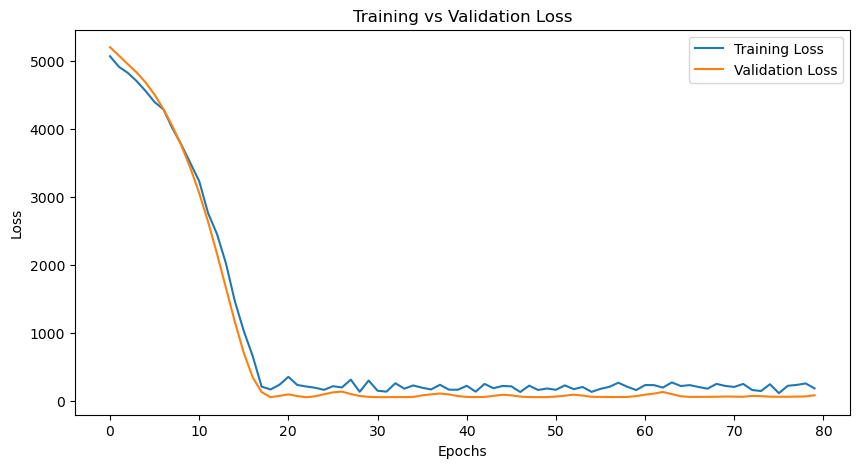

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


R² Score: -0.0336
Saved new best model with R² = -0.0336


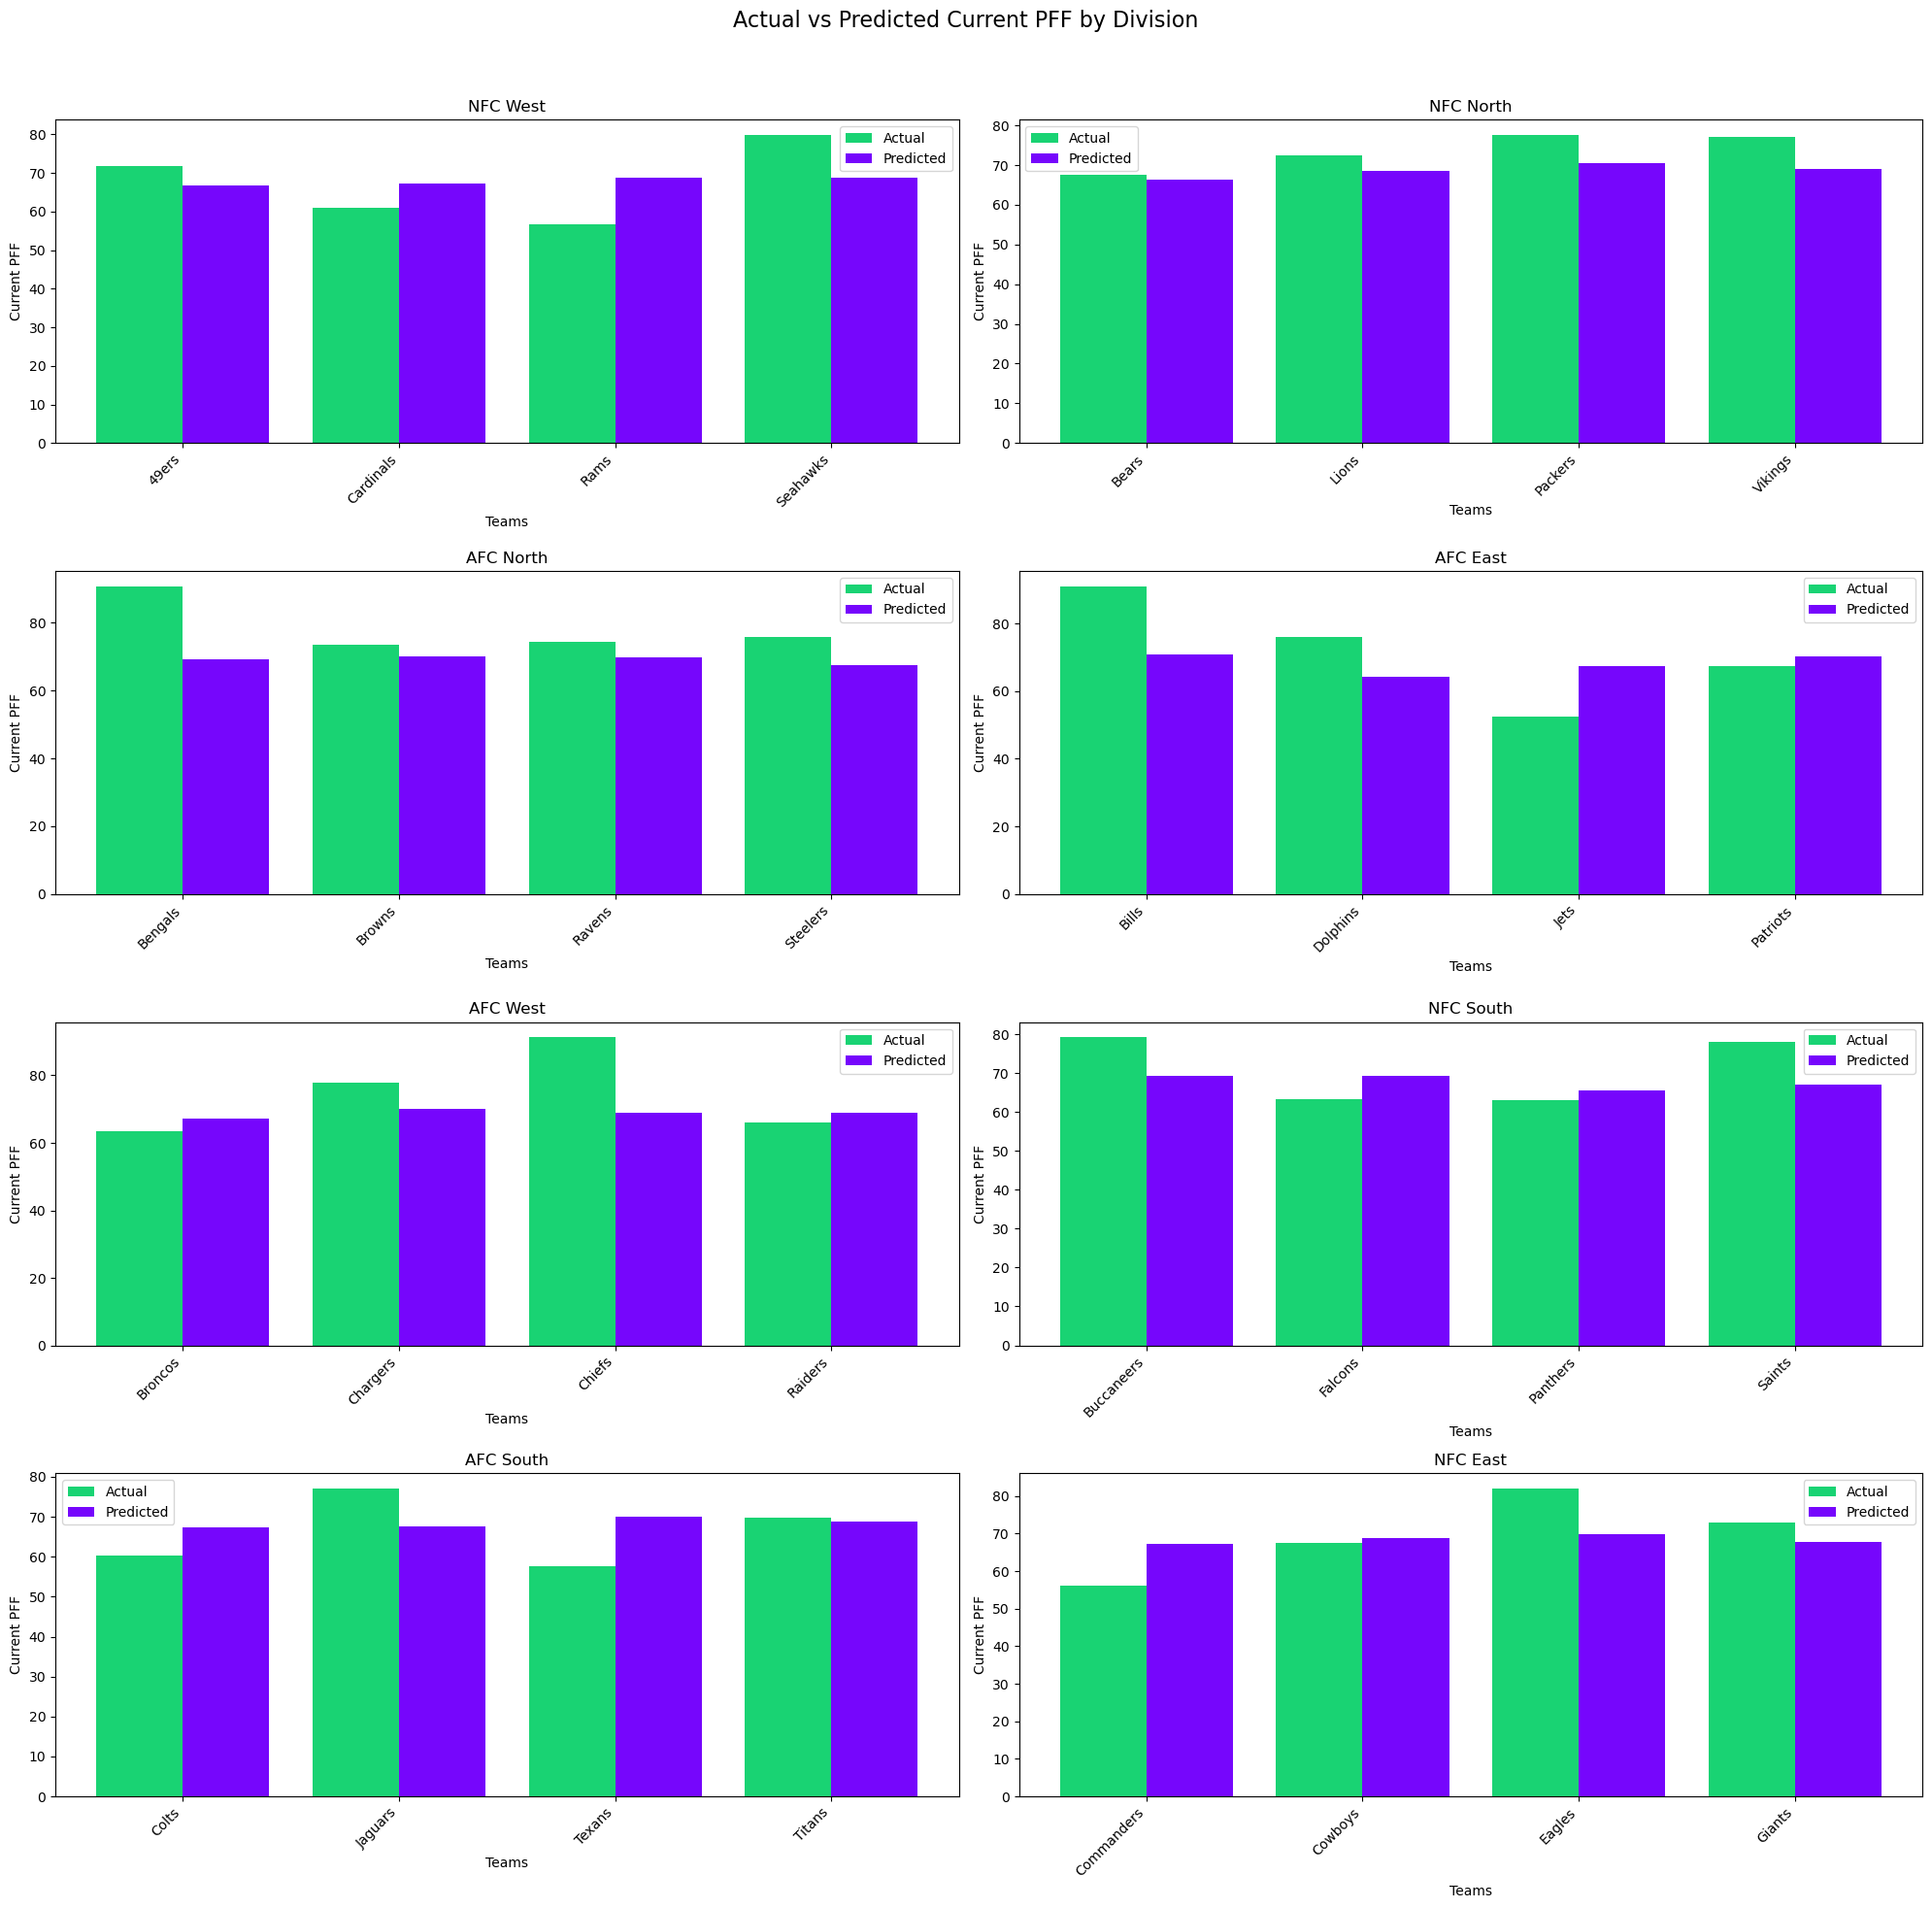

Best -0.033563423976958884
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 255.3042 - val_loss: 114.5027
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 170.8067 - val_loss: 98.2627
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 189.8517 - val_loss: 62.8281
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 237.2860 - val_loss: 59.0719
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 202.6086 - val_loss: 58.8198
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 350.9523 - val_loss: 58.5610
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 223.6020 - val_loss: 62.5204
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 269.6635 - val_loss: 69.0144
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 116.0131 - val_loss: 89.1501
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 215.2171 - val_loss: 112.5932
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 176.1294 - val_loss: 108.6208
Epoch 12/100
4/4 ━━━━

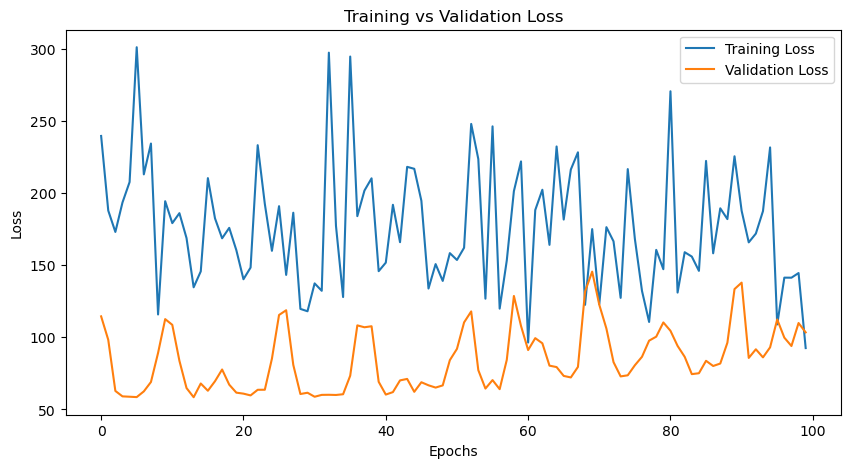

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


R² Score: 0.0915
Saved new best model with R² = 0.0915


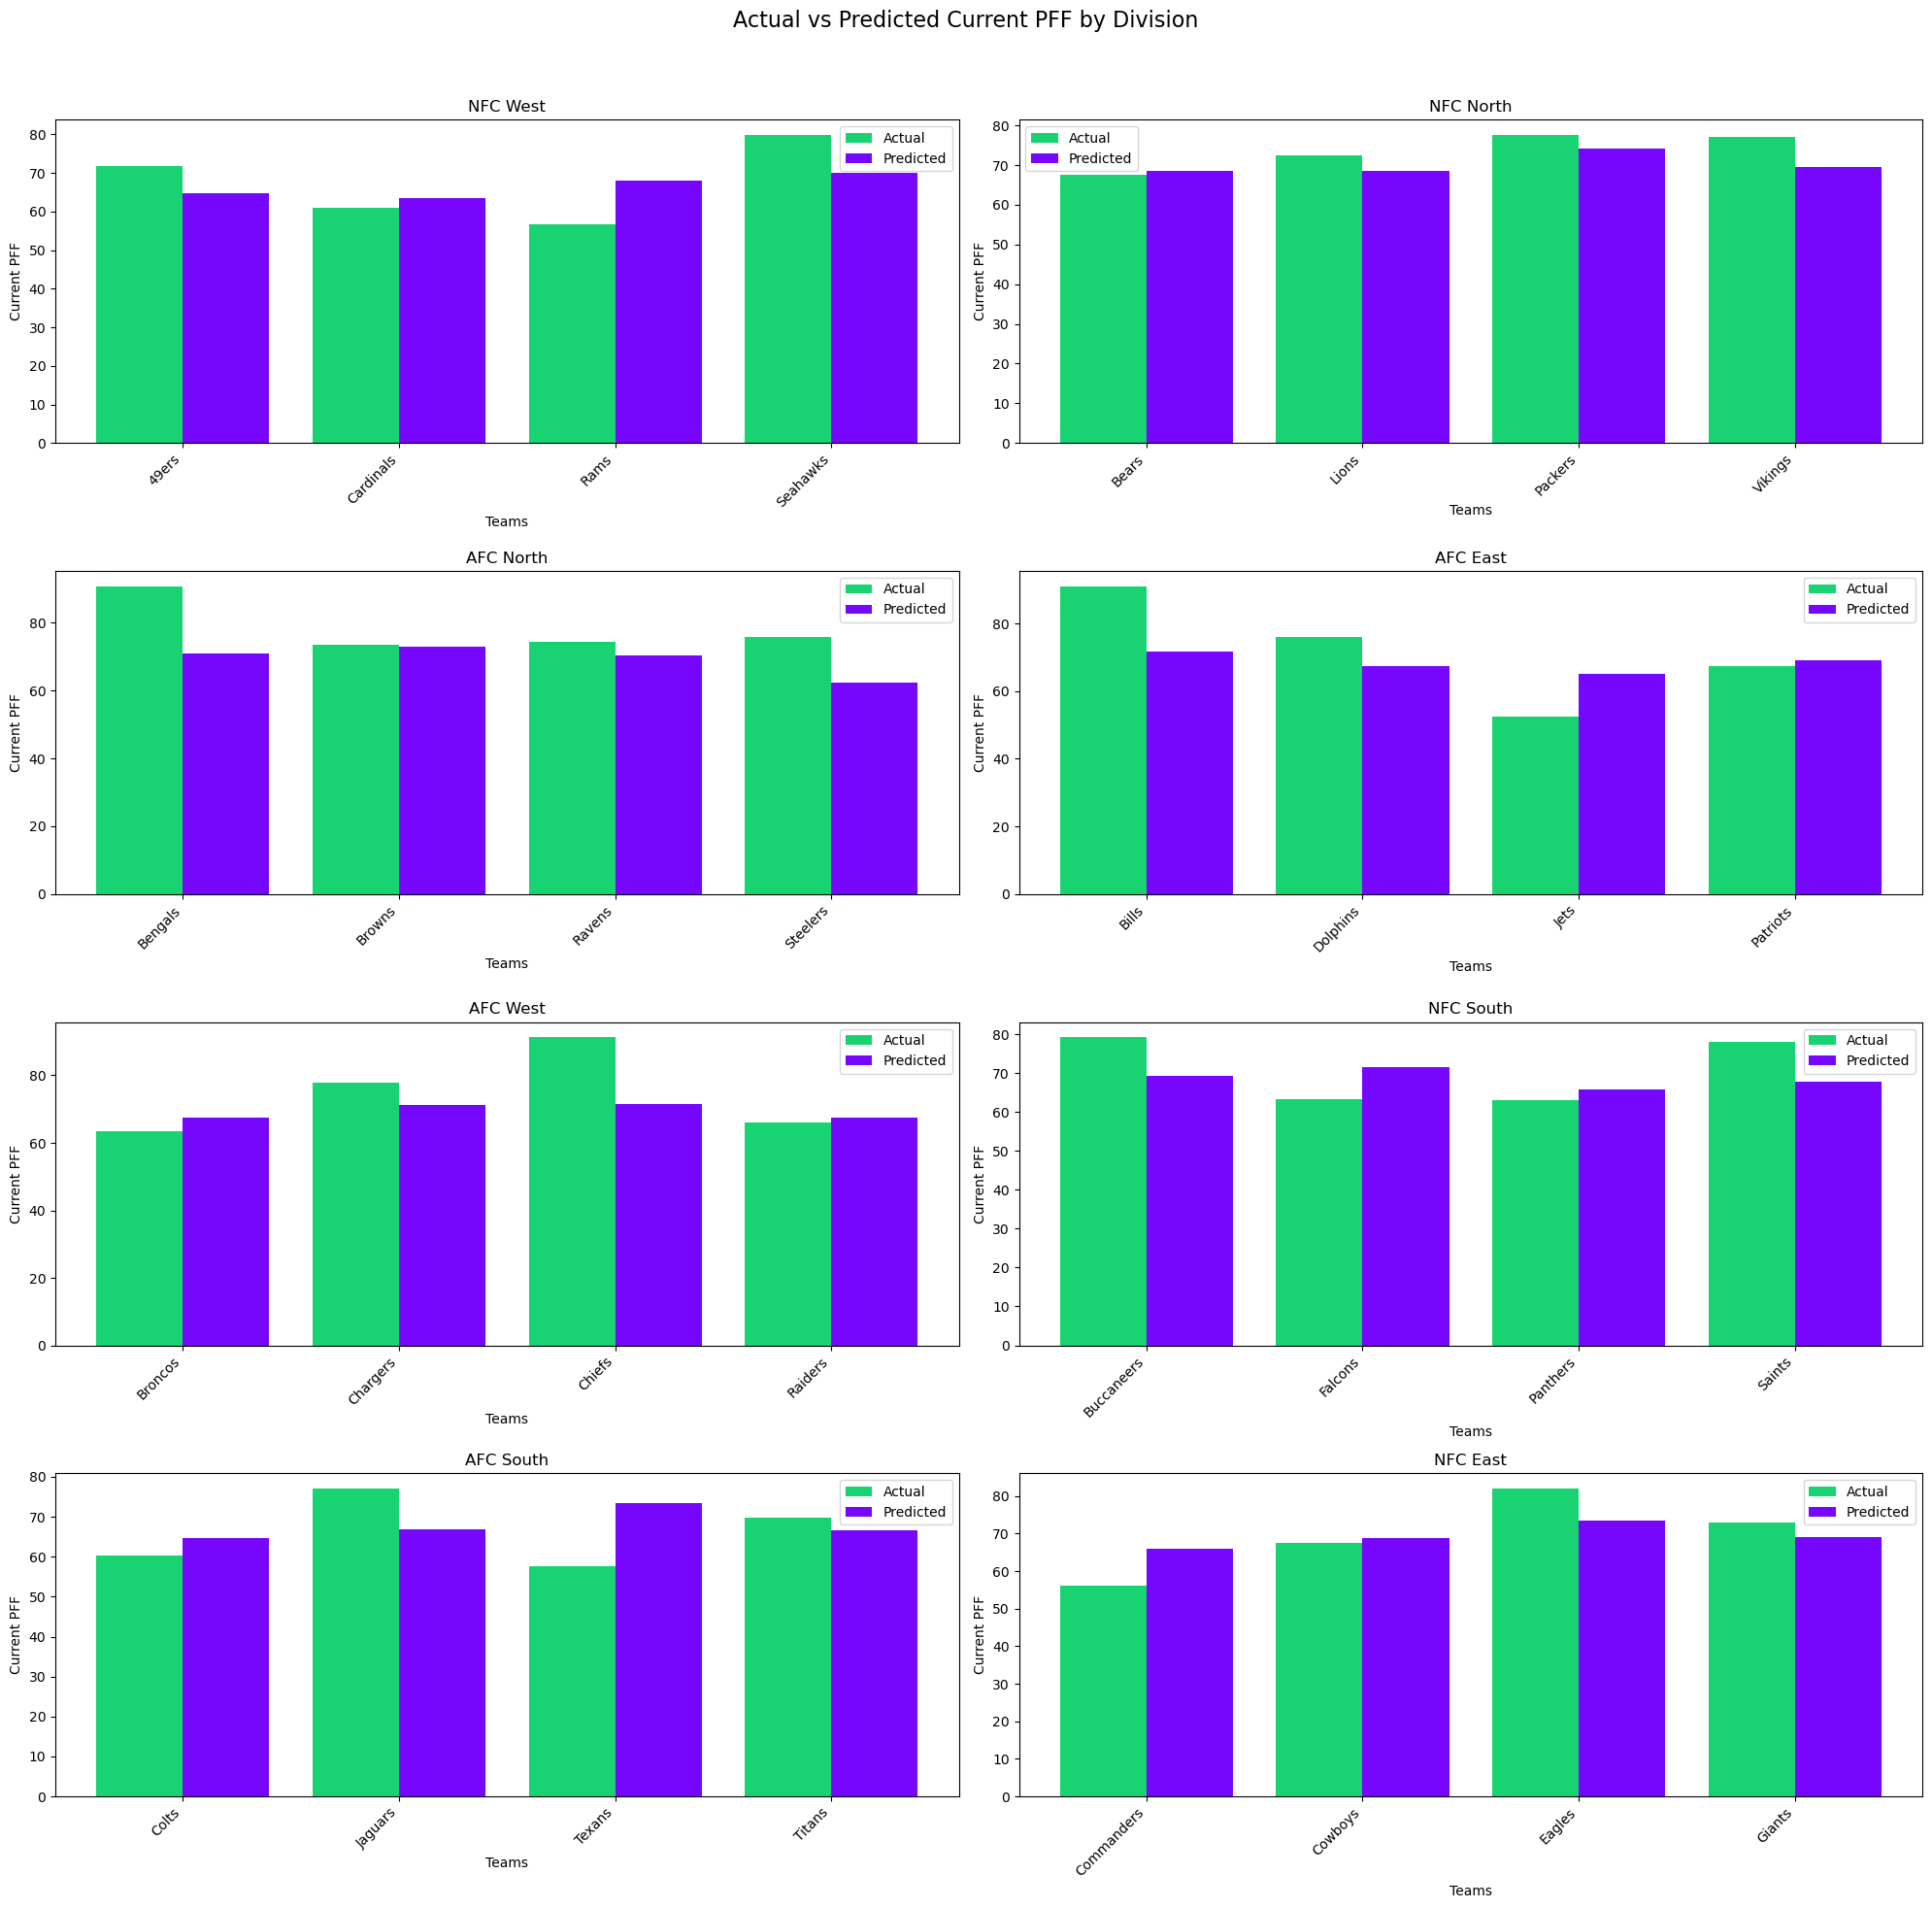

Best 0.091521167022797
Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 185.7442 - val_loss: 100.8569
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 93.4421 - val_loss: 100.6919
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 167.5829 - val_loss: 105.7938
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 187.5556 - val_loss: 98.7714
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 151.2768 - val_loss: 103.6431
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 163.2469 - val_loss: 111.4658
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 130.4176 - val_loss: 100.2010
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 95.4808 - val_loss: 95.1803
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 151.1793 - val_loss: 95.4321
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 149.7001 - val_loss: 151.6570
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 195.9641 - val_loss: 147.2768
Epoch 12/150
4/4 ━━━━

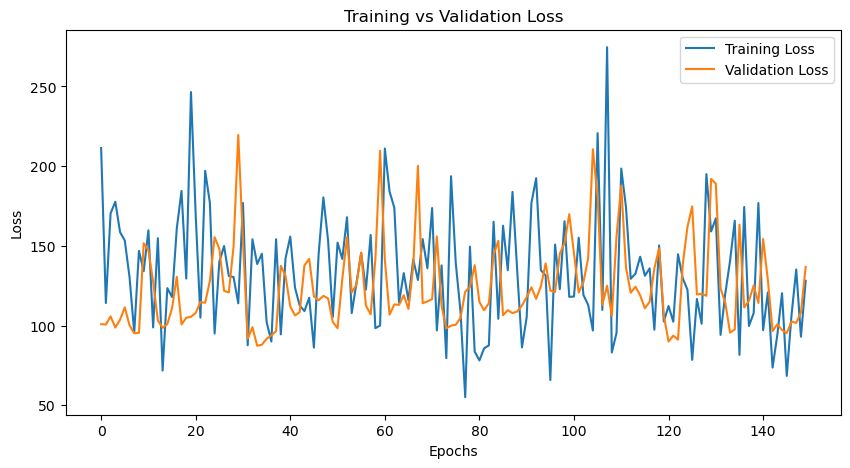

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


R² Score: 0.2051
Saved new best model with R² = 0.2051


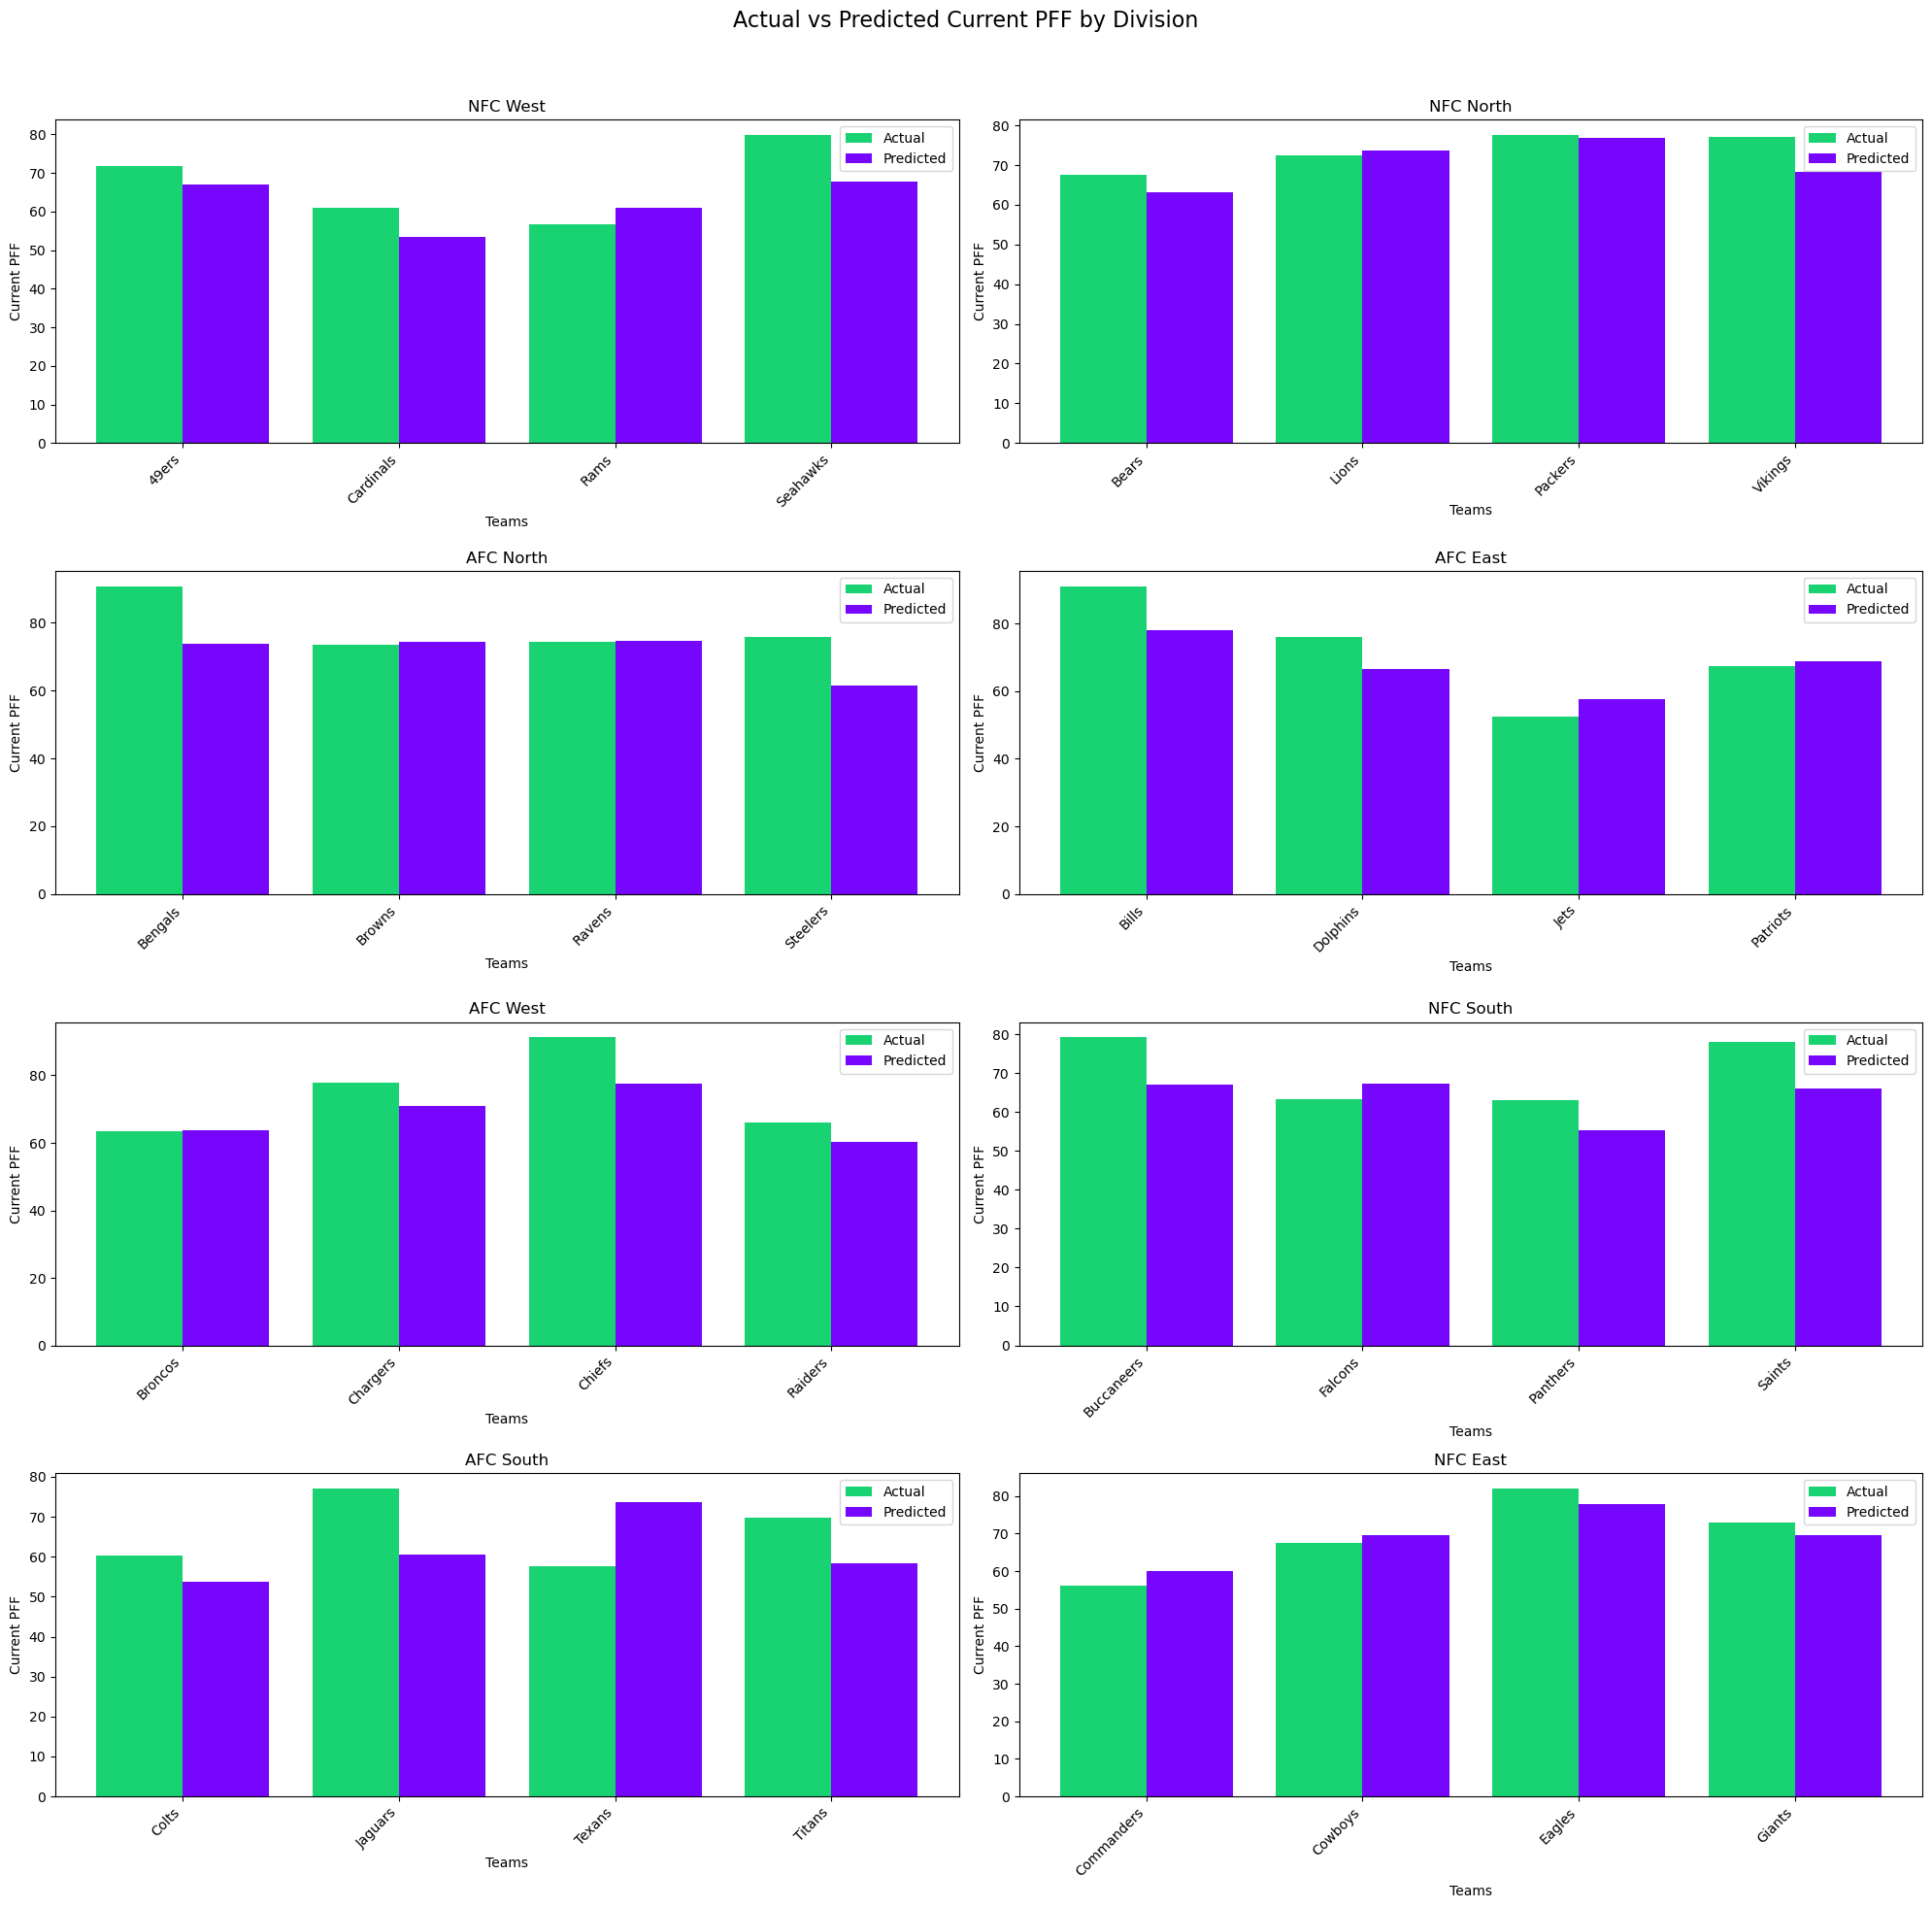

Best 0.20508251787412013
Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 86.8329 - val_loss: 105.2358
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 112.3703 - val_loss: 119.7978
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 122.2751 - val_loss: 115.0194
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 115.8524 - val_loss: 102.9804
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 111.2405 - val_loss: 122.3316
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 92.2159 - val_loss: 111.2229
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 87.6676 - val_loss: 126.8537
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 166.9860 - val_loss: 109.4449
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 115.7696 - val_loss: 106.0315
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 87.1771 - val_loss: 116.0805
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 135.2701 - val_loss: 108.9987
Epoch 12/200
4/4 

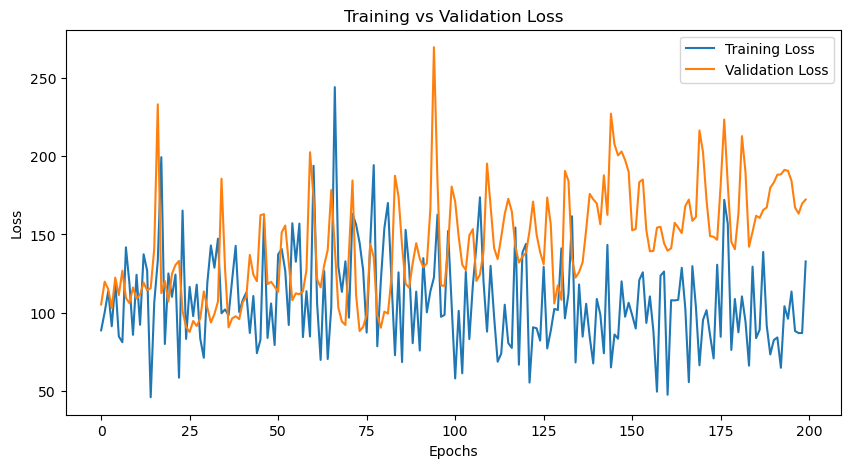

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


R² Score: 0.2348
Saved new best model with R² = 0.2348


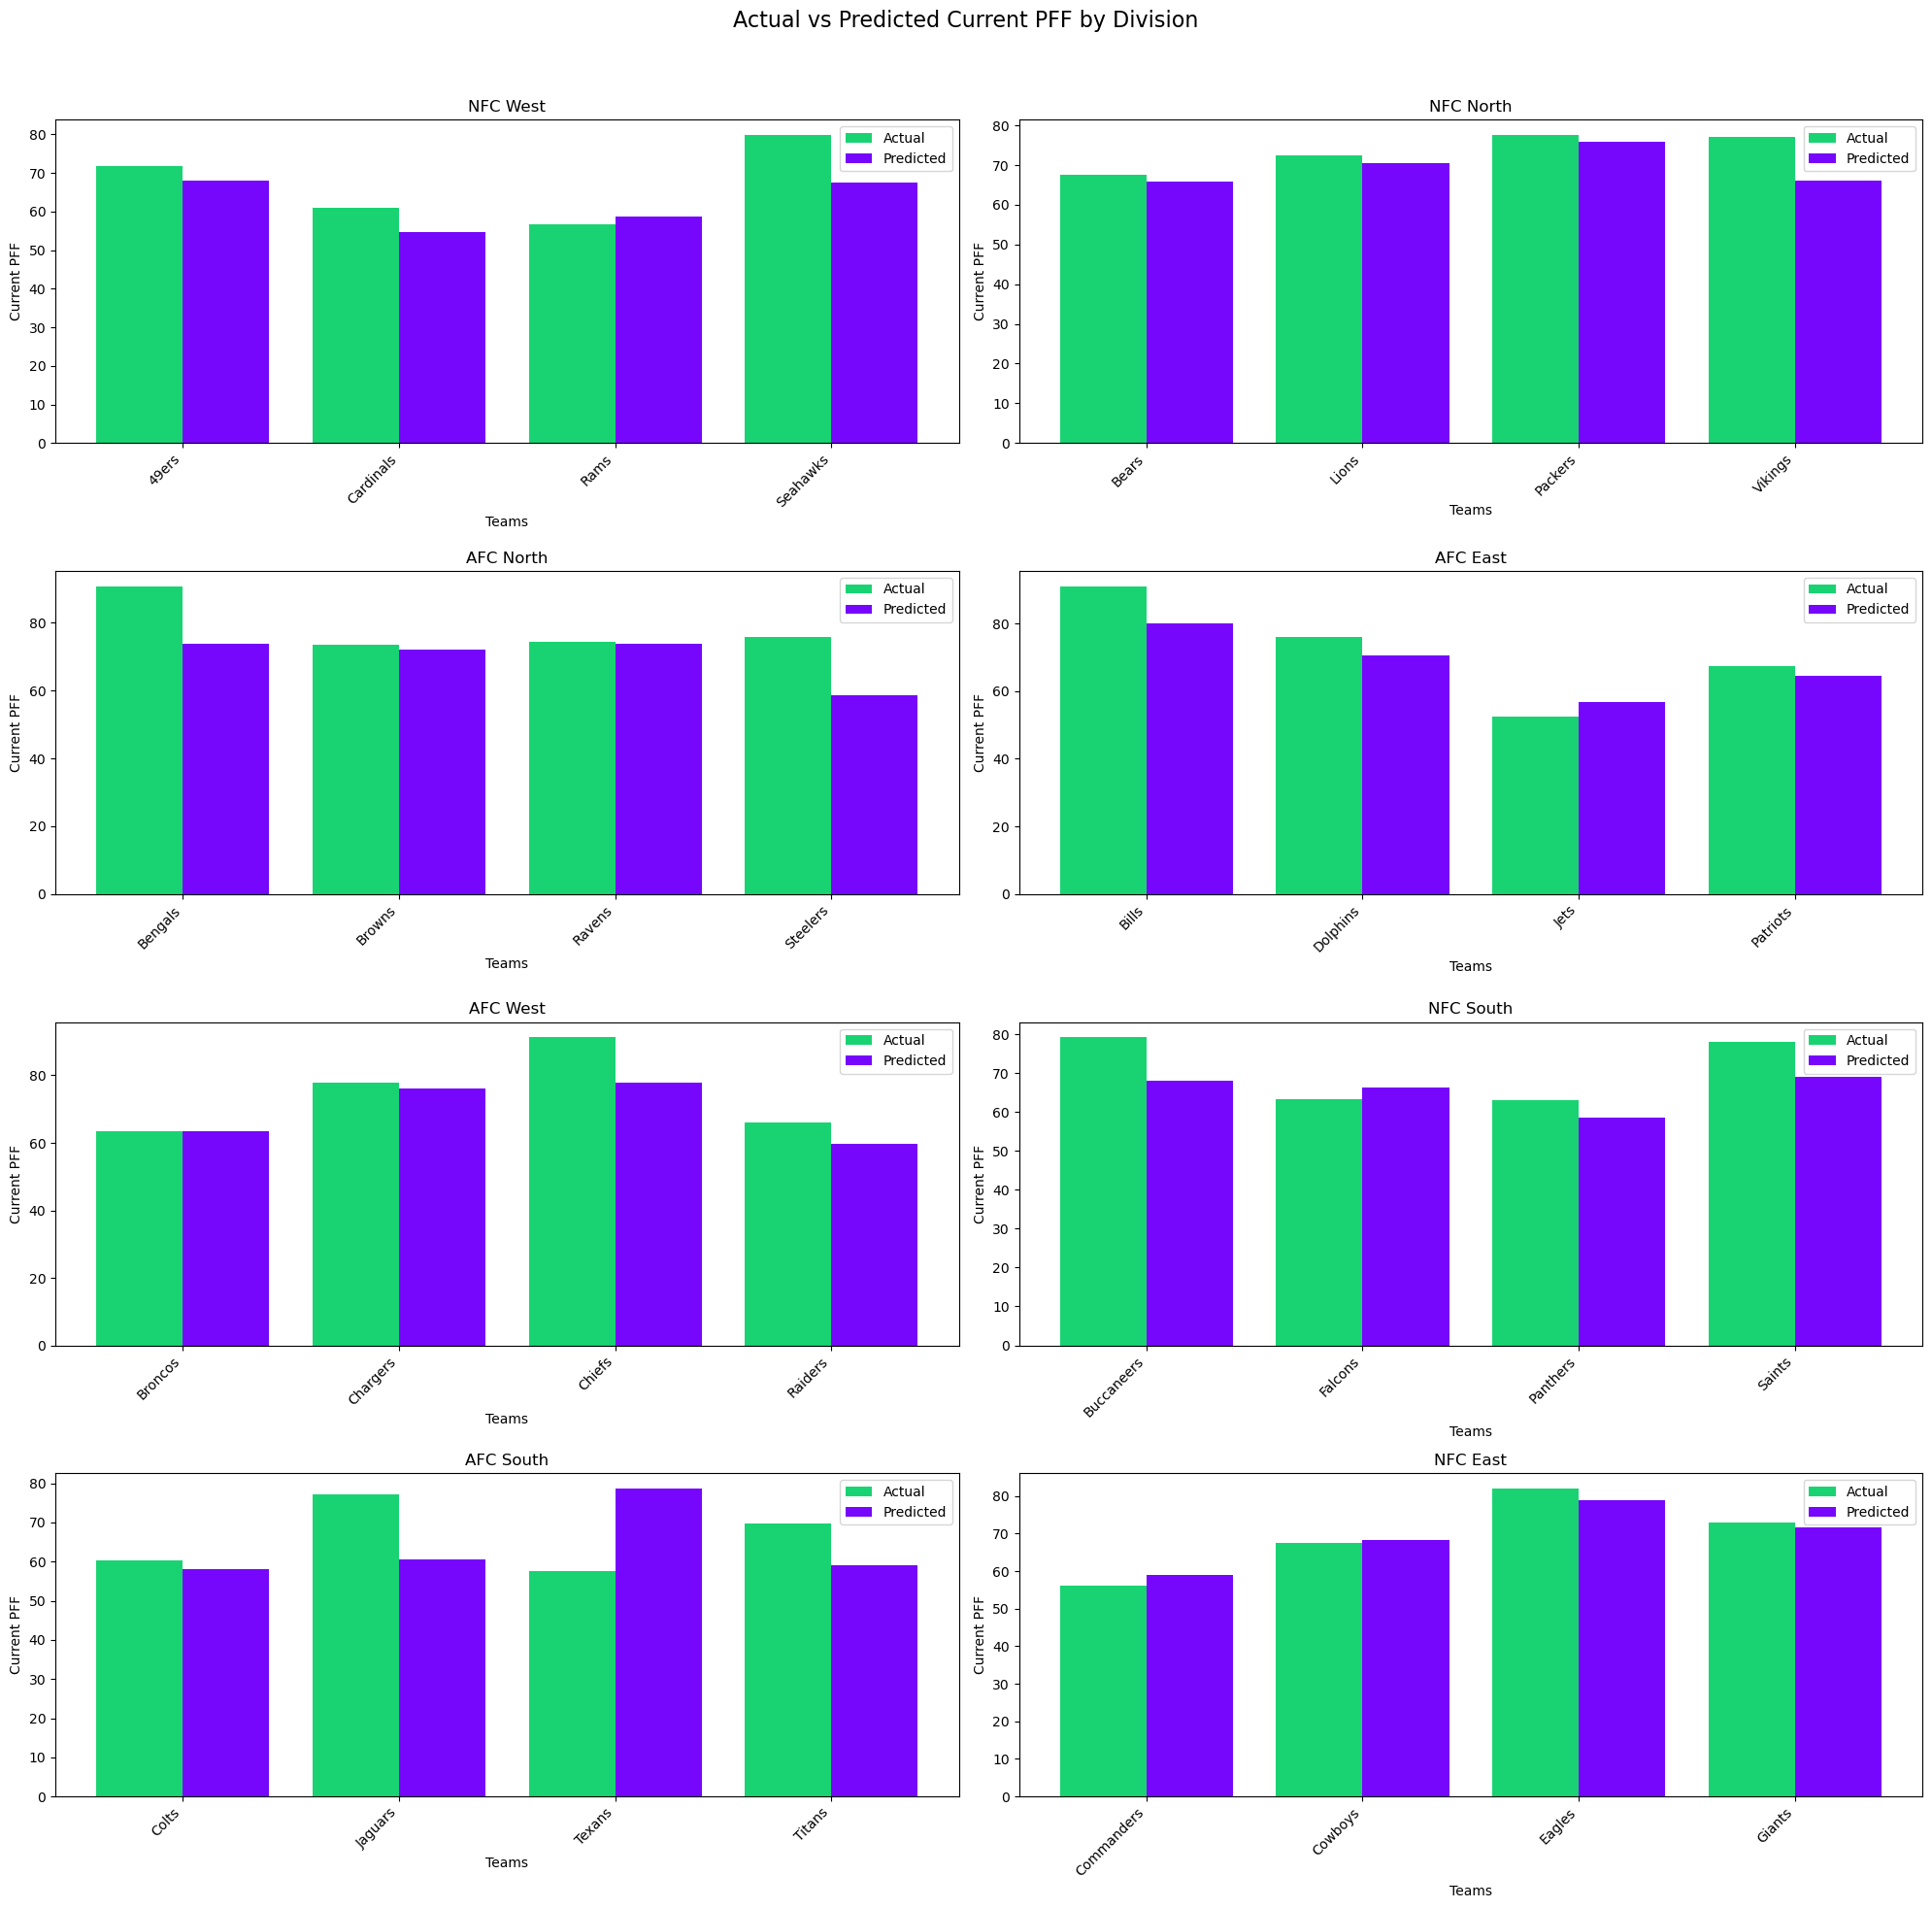

Best 0.2347882220391947
Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 105.5316 - val_loss: 164.8913
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 97.6615 - val_loss: 167.4871
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 122.1652 - val_loss: 165.3536
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 154.4613 - val_loss: 200.6294
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 146.8585 - val_loss: 161.0230
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 68.8226 - val_loss: 148.1201
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 92.1165 - val_loss: 152.6198
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 81.7807 - val_loss: 163.6594
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 138.8272 - val_loss: 149.6689
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 65.7435 - val_loss: 148.9136
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 117.7847 - val_loss: 161.2686
Epoch 12/250
4/4 ━━━

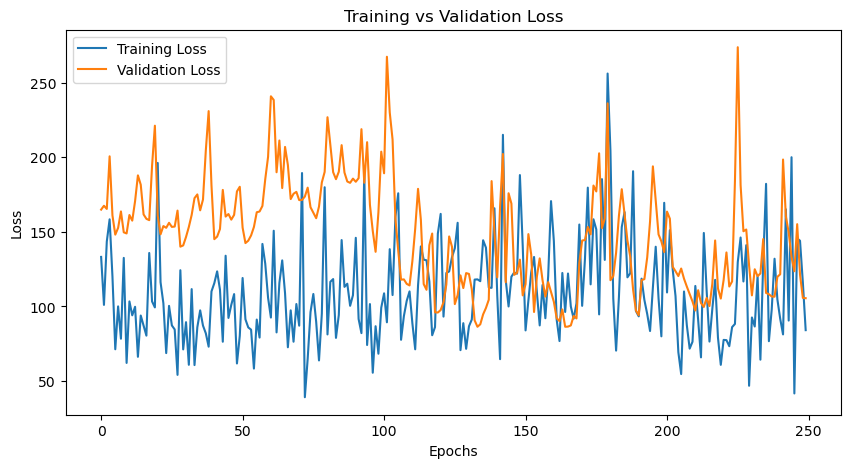

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


R² Score: 0.4264
Saved new best model with R² = 0.4264


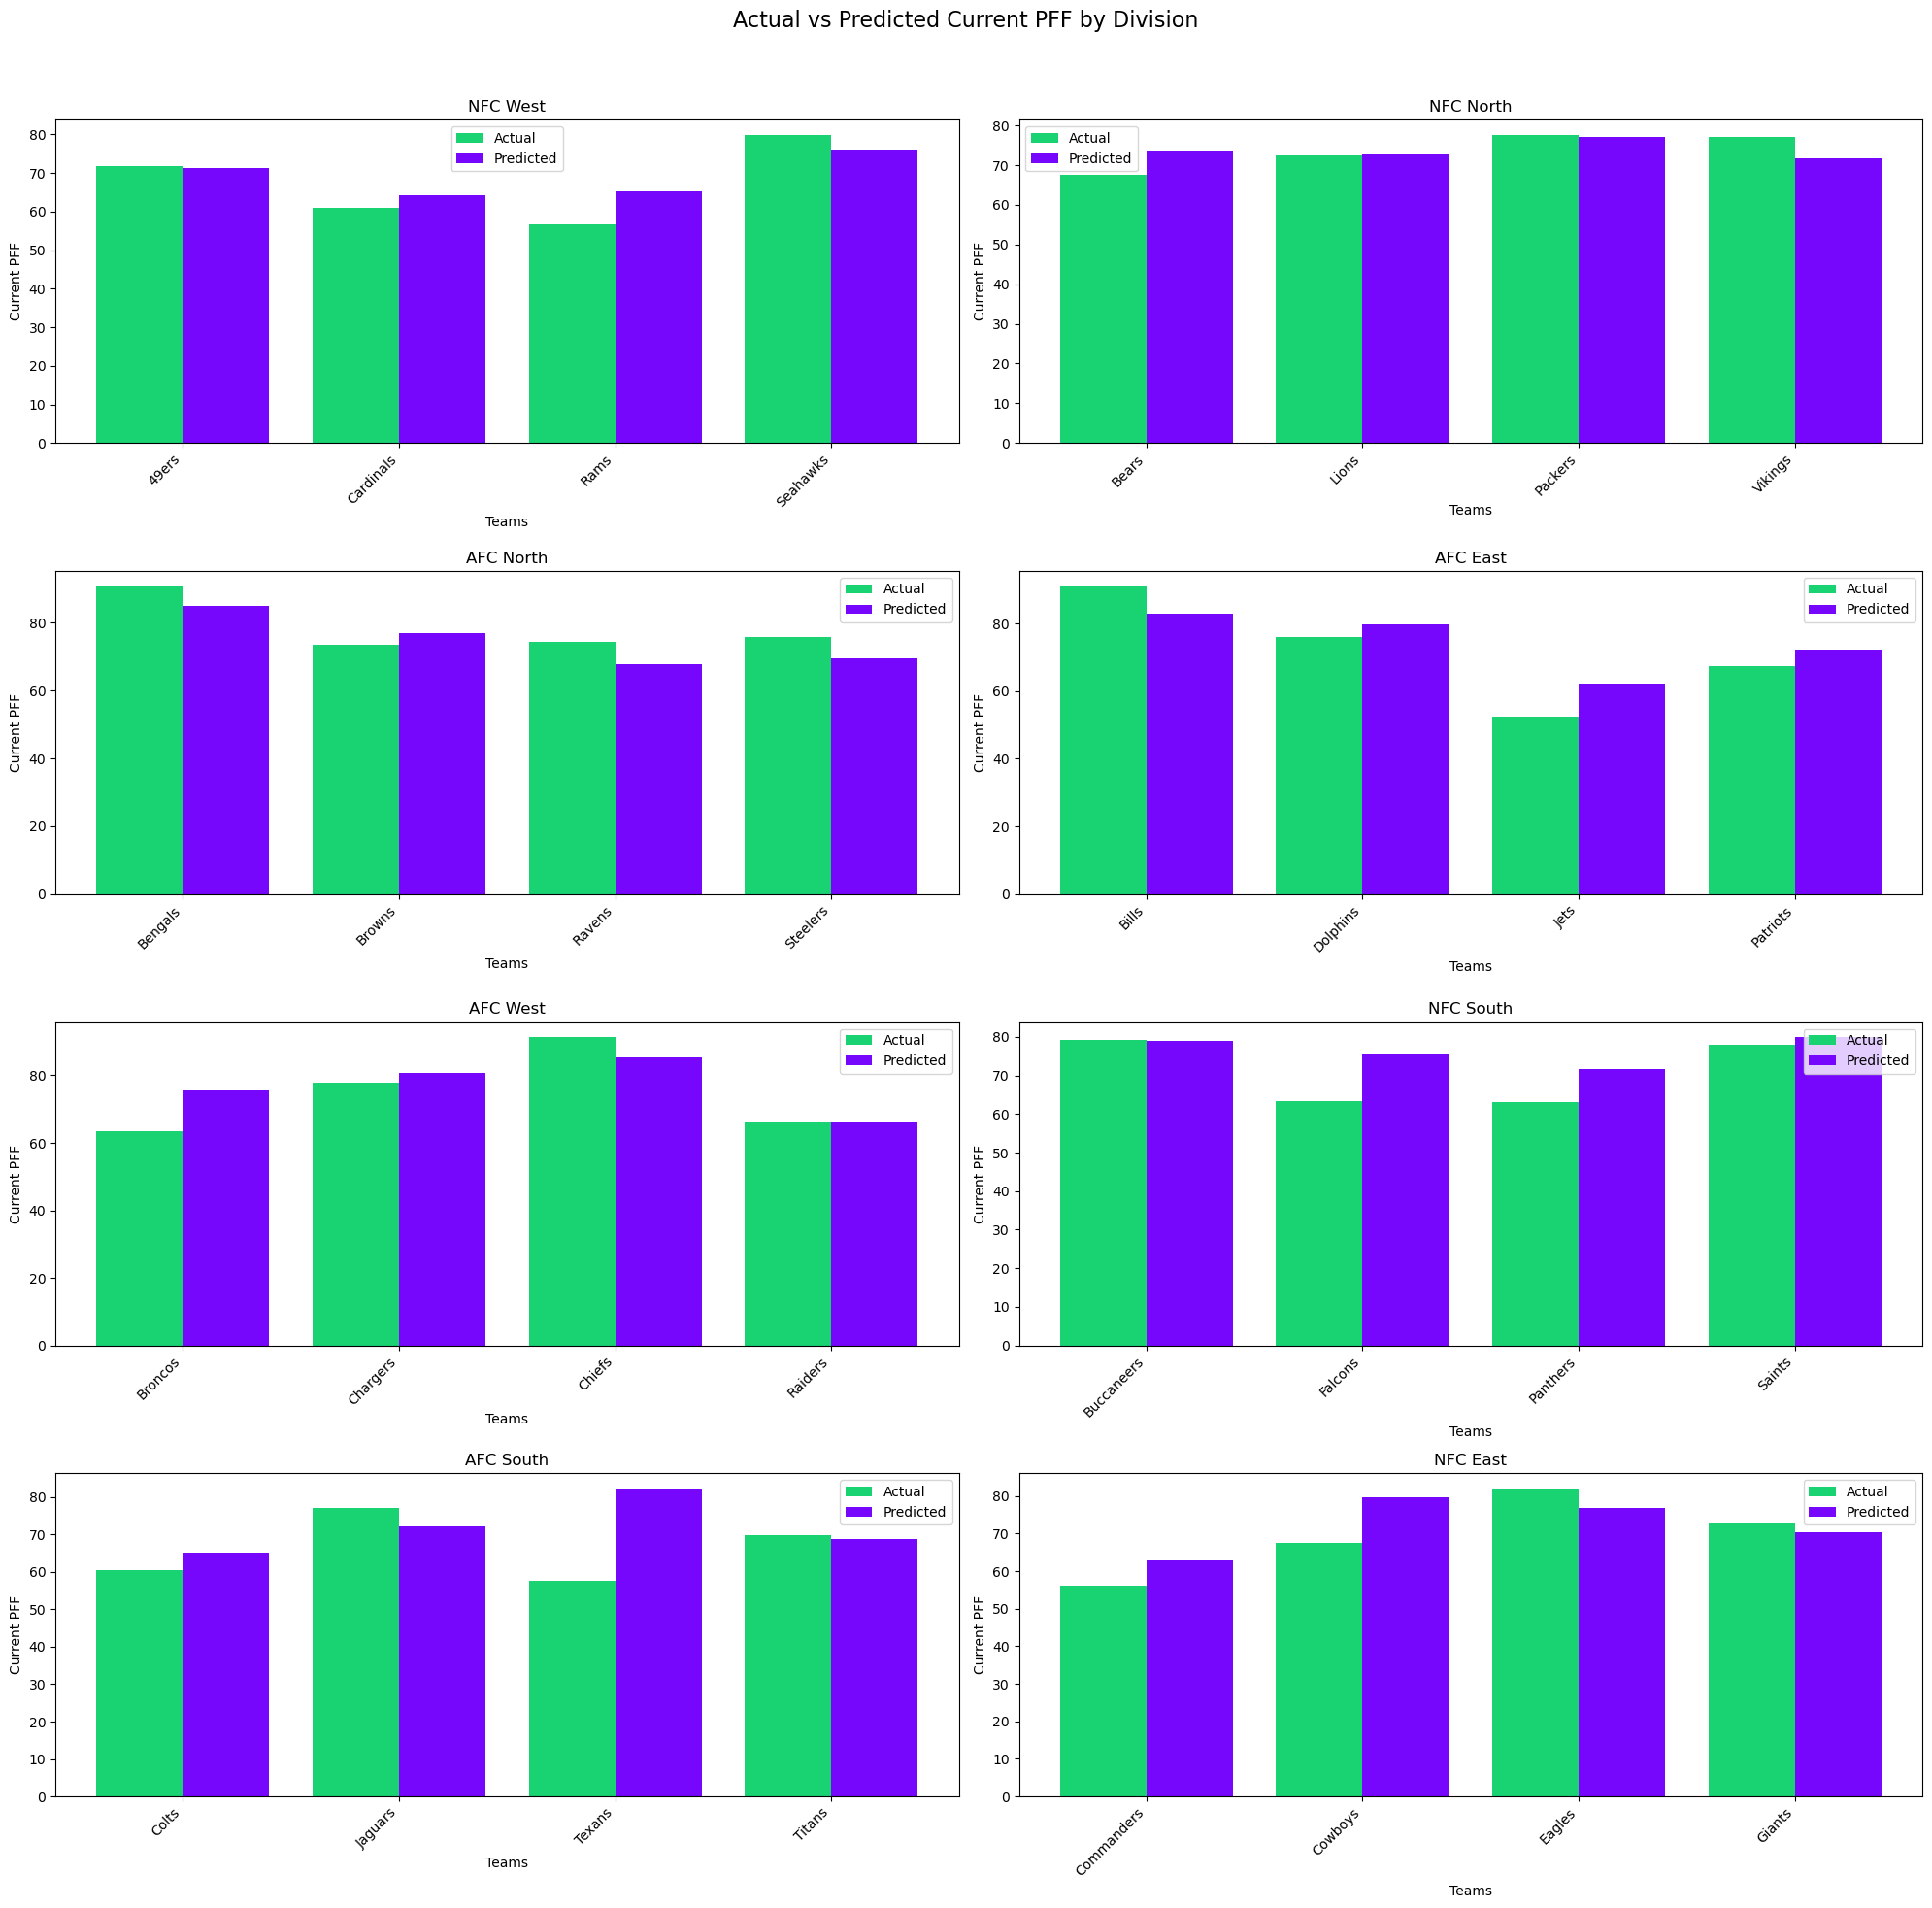

Best 0.4264118302553056
Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 121.2161 - val_loss: 102.1298
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 112.5448 - val_loss: 123.2424
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.7293 - val_loss: 157.1514
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 102.5182 - val_loss: 133.3275
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 125.8339 - val_loss: 104.8802
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 90.9936 - val_loss: 96.2775
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 112.0809 - val_loss: 97.1184
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 151.0426 - val_loss: 95.0683
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 125.2589 - val_loss: 108.5401
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 72.4721 - val_loss: 158.2919
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 132.1450 - val_loss: 171.2799
Epoch 12/500
4/4 ━━━━━

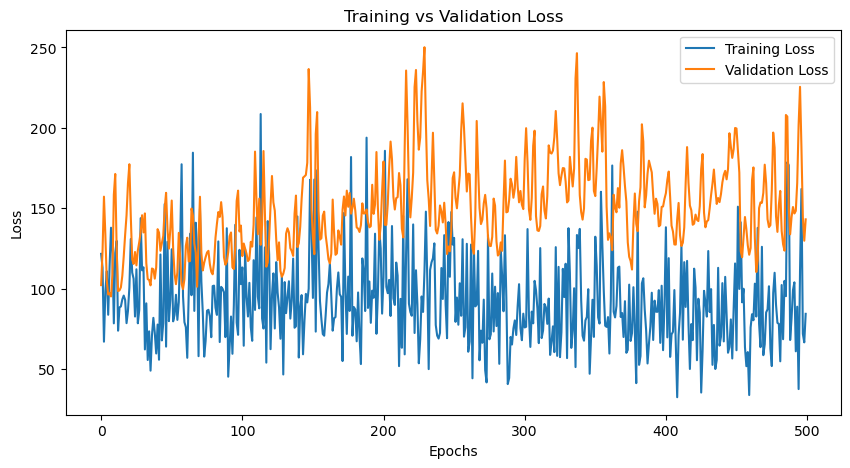

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R² Score: 0.4131


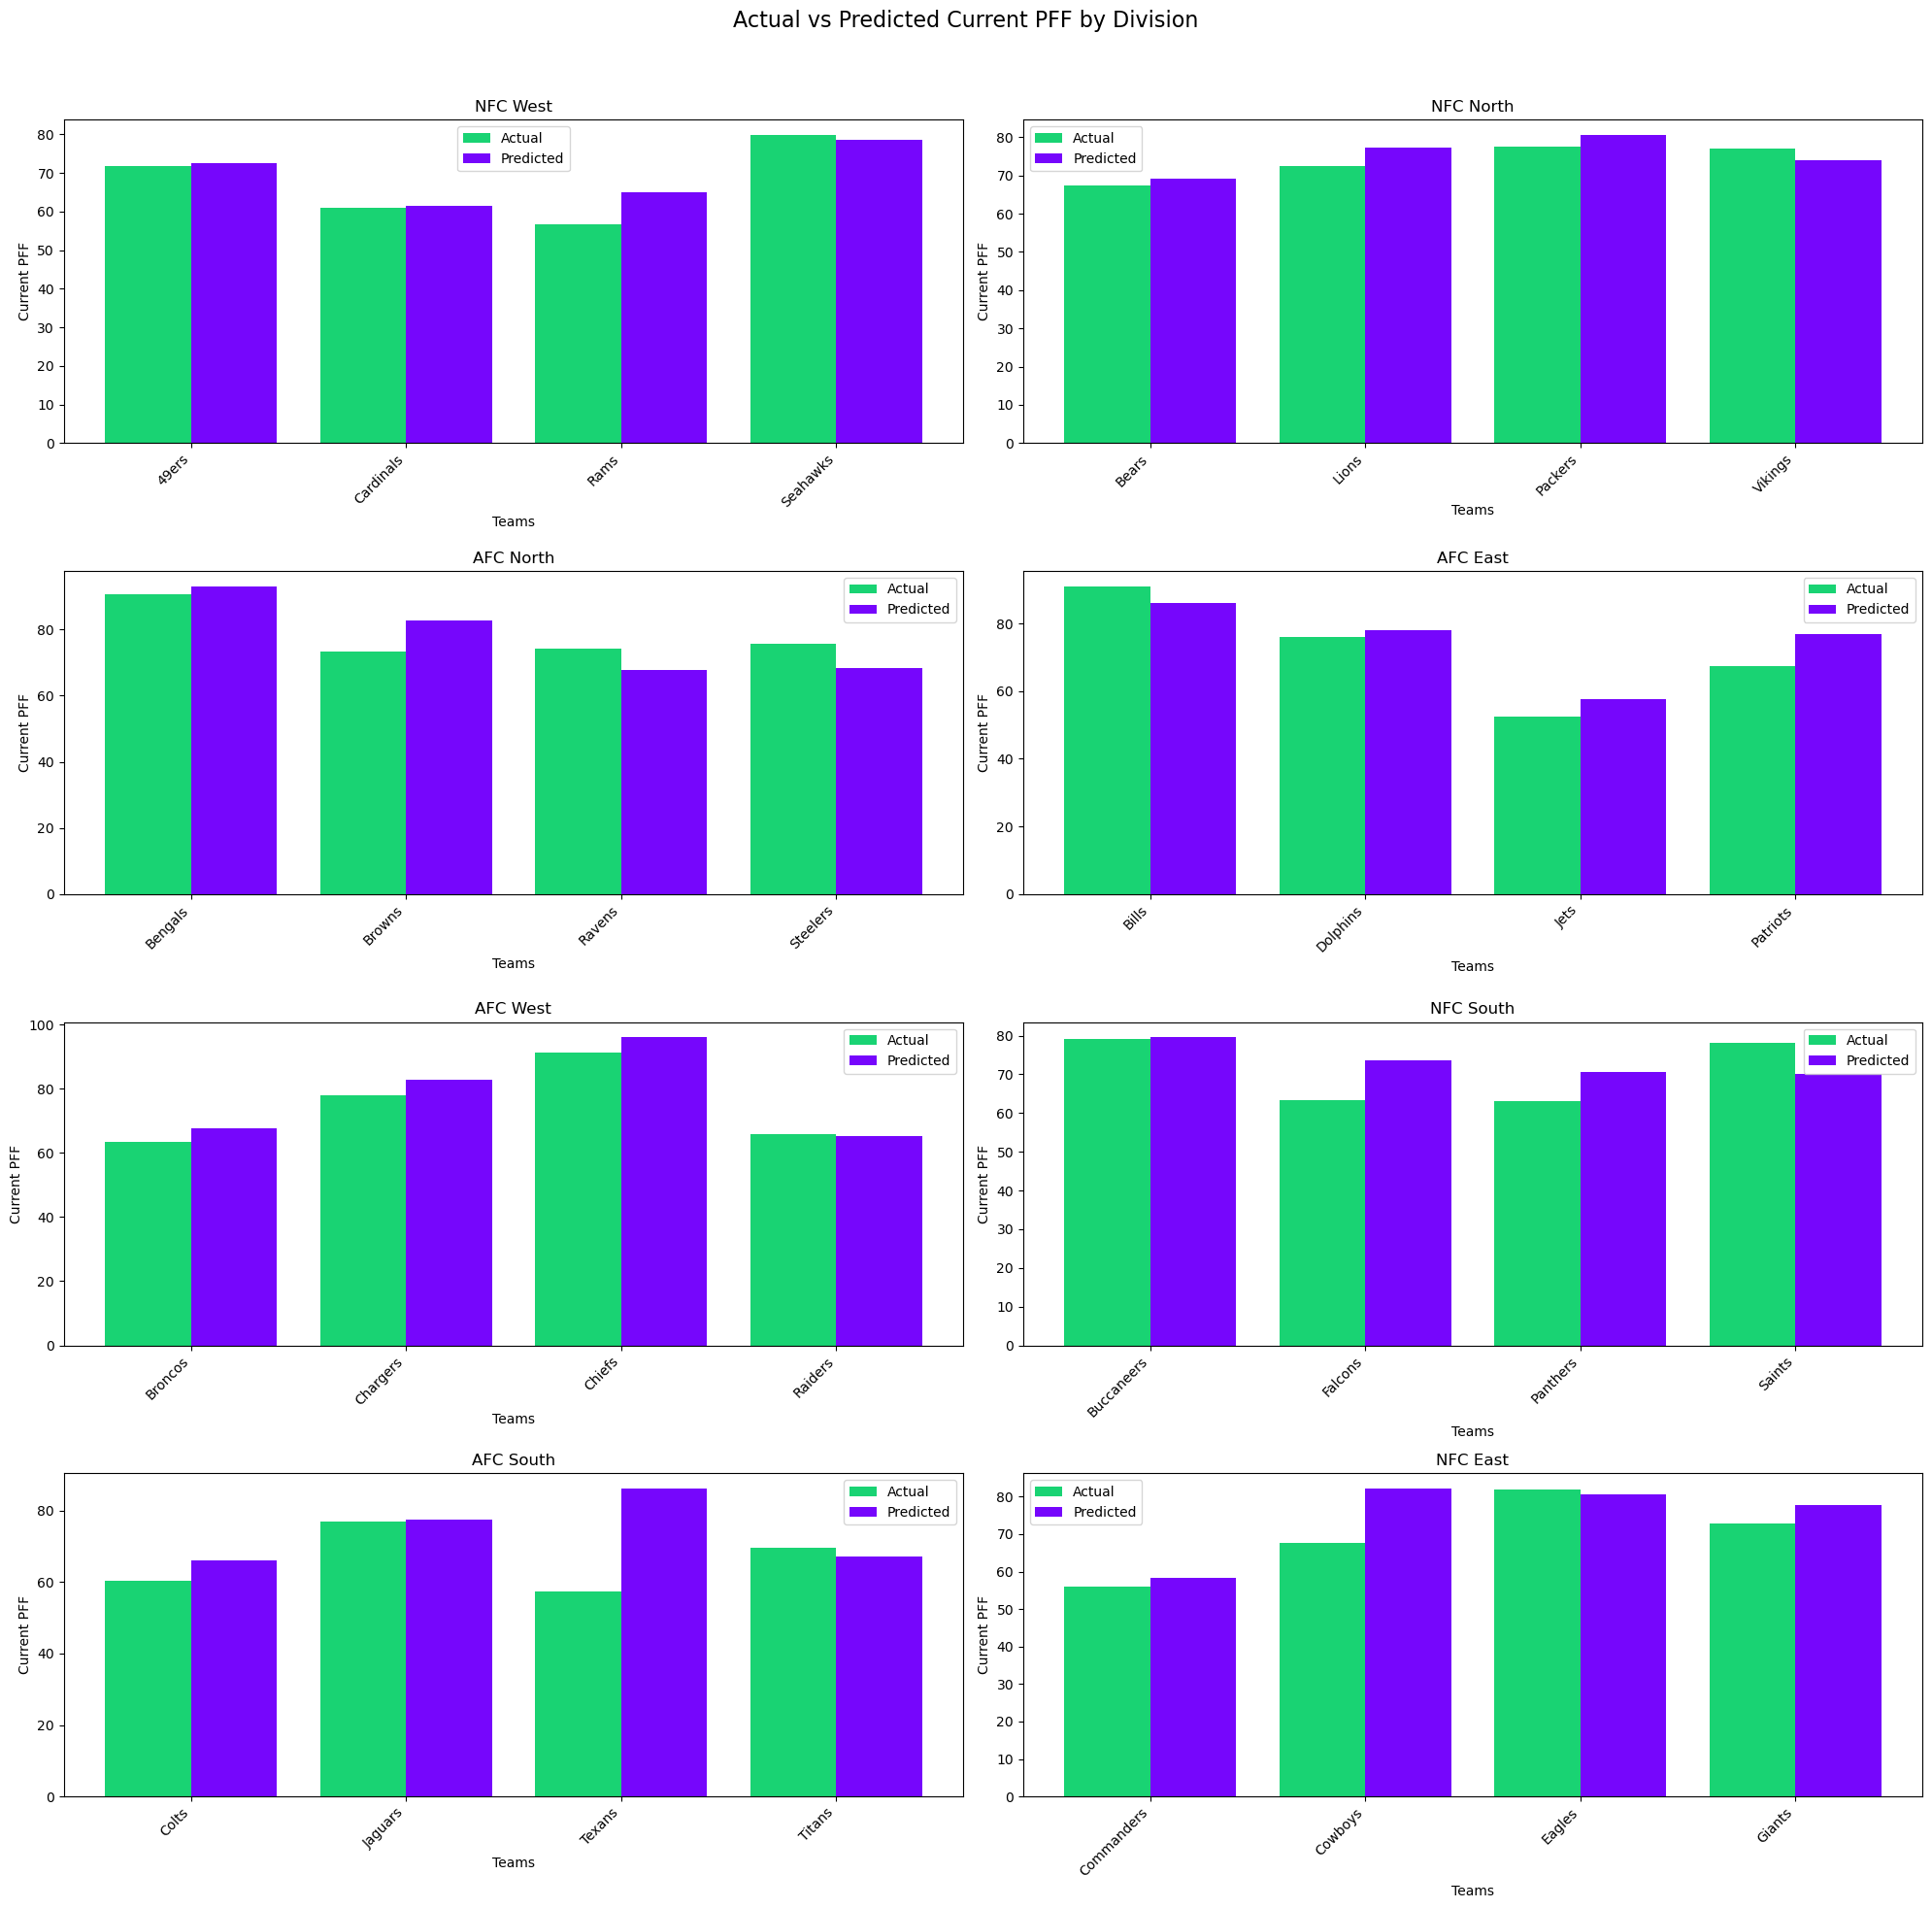

Best 0.4264118302553056
Epoch 1/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 121.4473 - val_loss: 167.6547
Epoch 2/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 84.7933 - val_loss: 193.1079
Epoch 3/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 88.5565 - val_loss: 158.6526
Epoch 4/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 99.1156 - val_loss: 115.7166
Epoch 5/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 125.3764 - val_loss: 121.9140
Epoch 6/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 157.1501 - val_loss: 136.0572
Epoch 7/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 61.8689 - val_loss: 123.2683
Epoch 8/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 43.3320 - val_loss: 123.3019
Epoch 9/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.8957 - val_loss: 141.0743
Epoch 10/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 164.5509 - val_loss: 154.1105
Epoch 11/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 106.5846 - val_loss: 155.0478
Epoch 12/750
4/4 ━━━━━

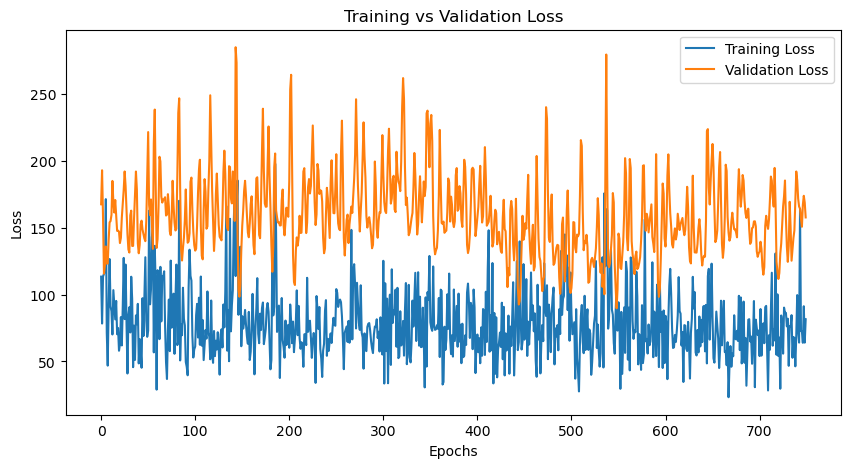

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


R² Score: 0.6042
Saved new best model with R² = 0.6042


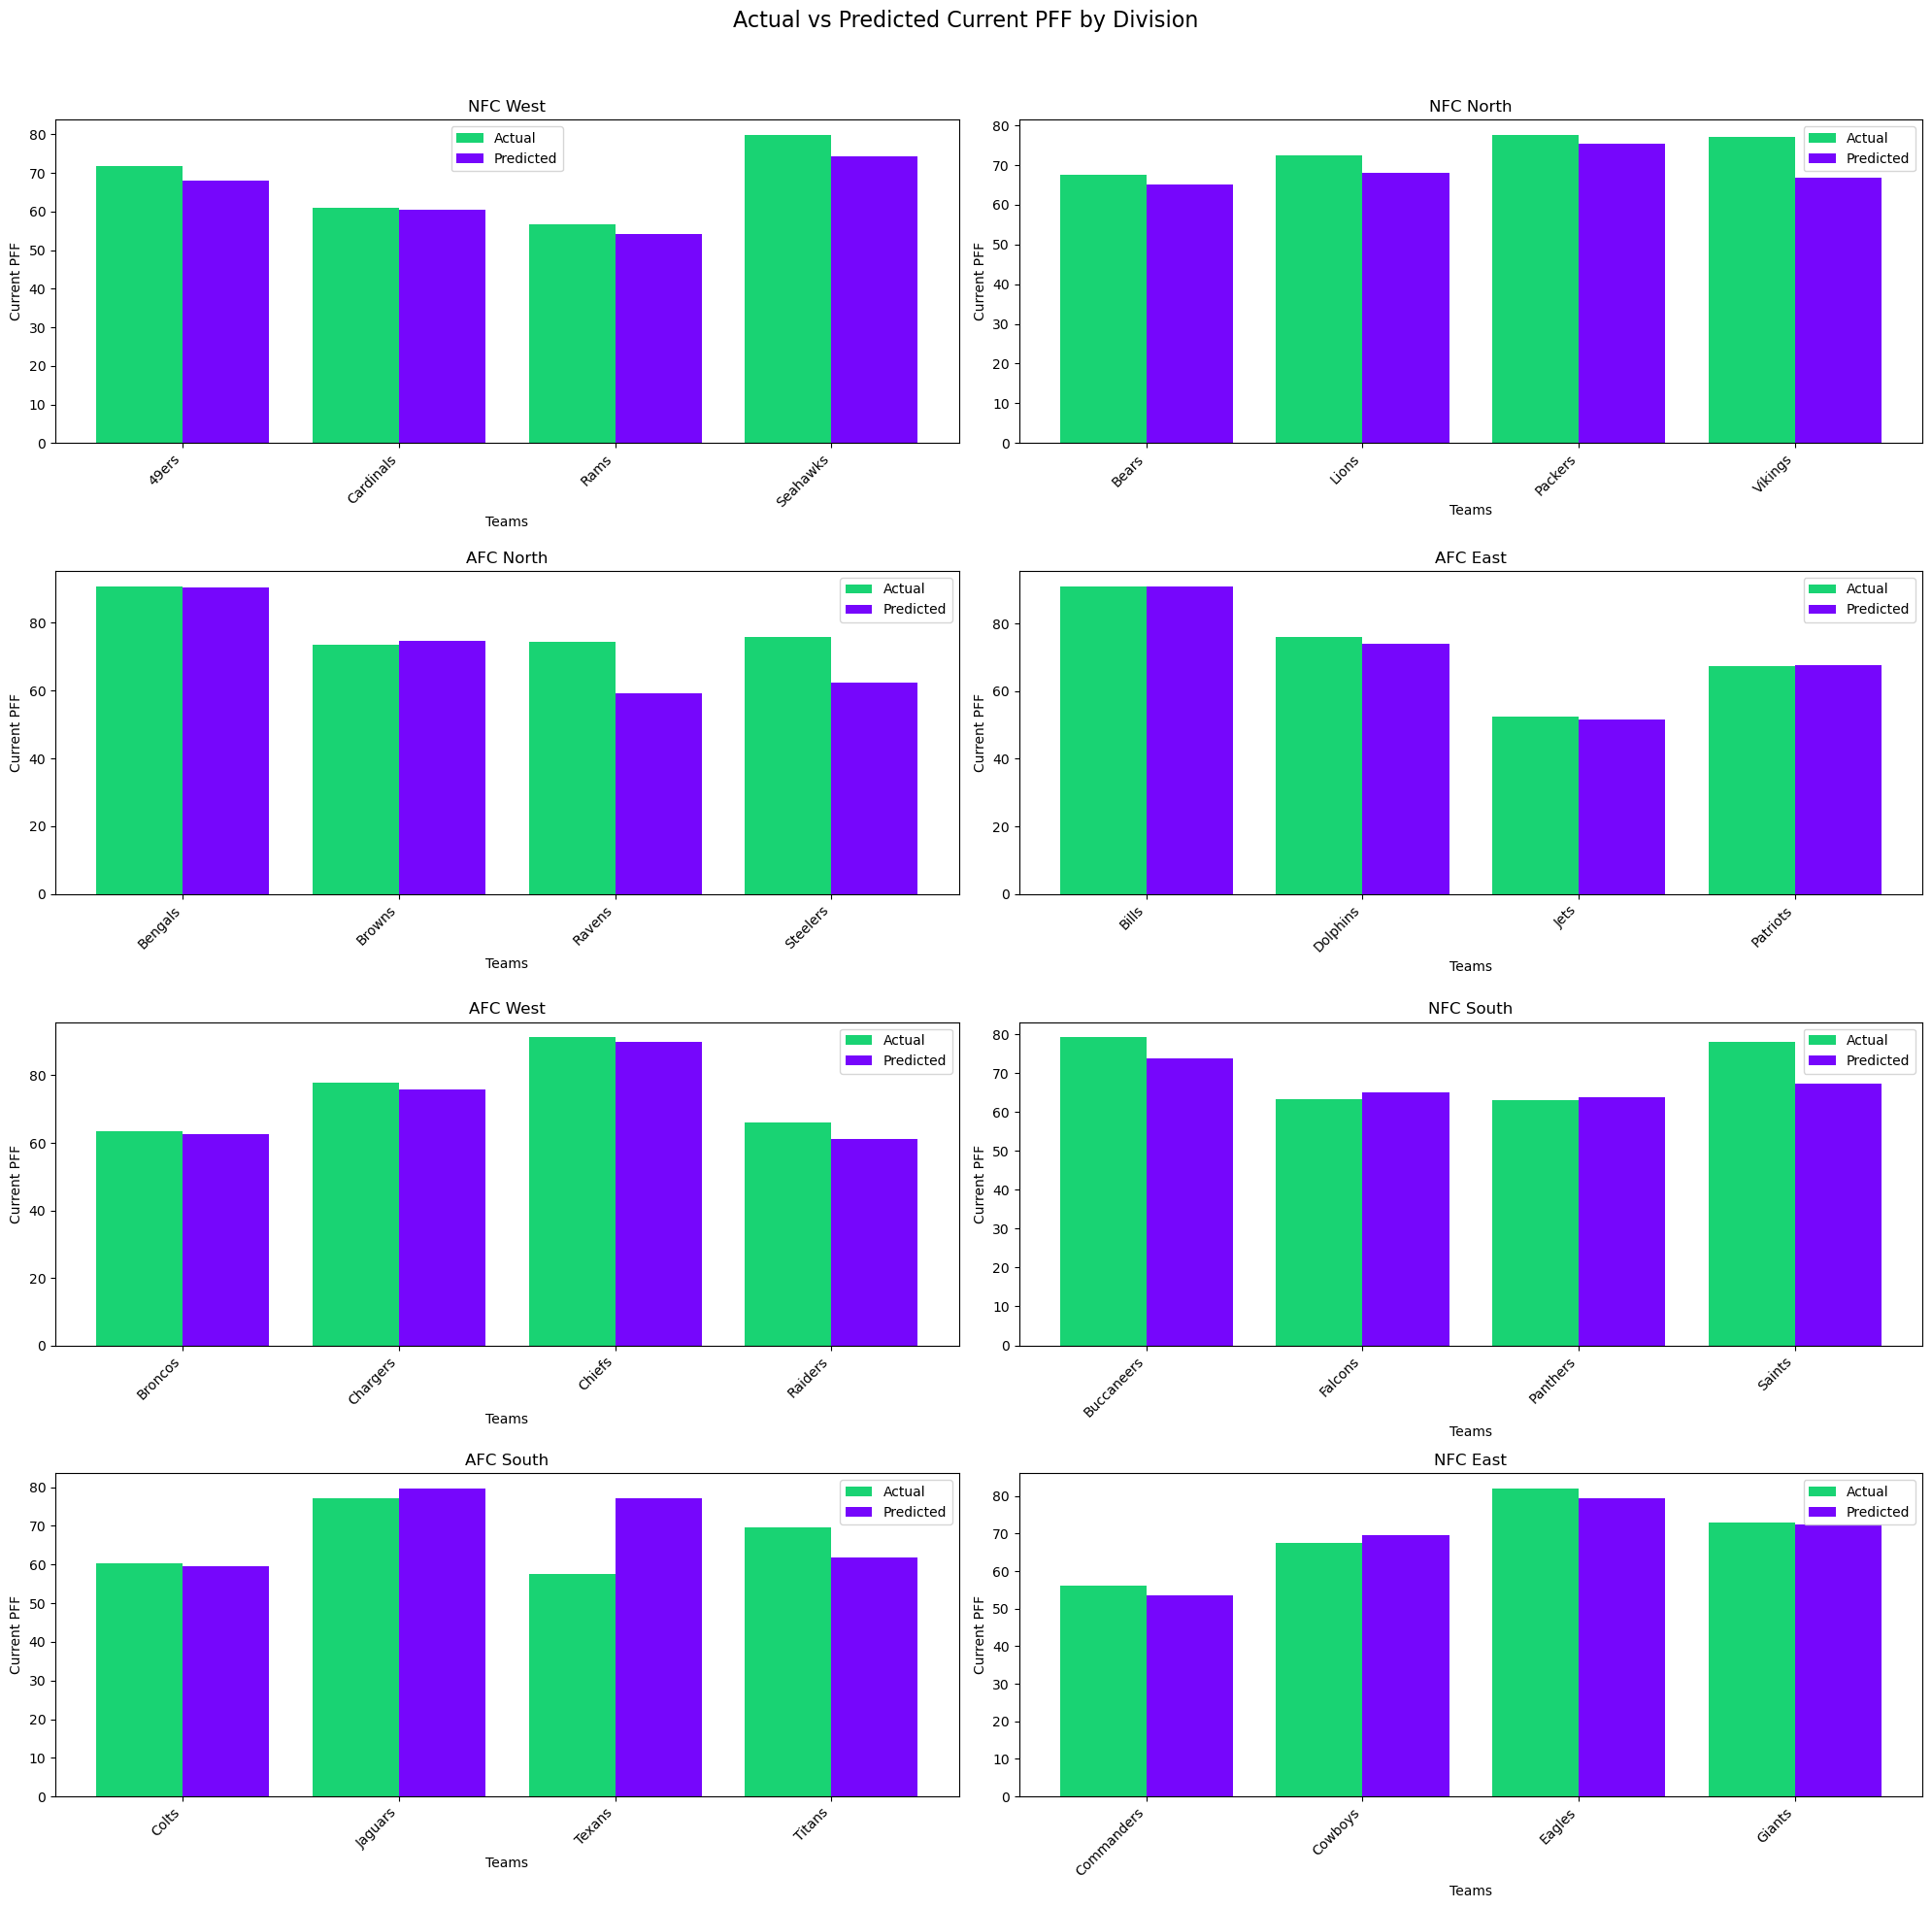

Best 0.6042252367165236


In [192]:
# Train the model
#history = model.fit(X, y, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
epoch_list = [80, 100, 150, 200, 250, 500, 750]
best_r2 = -np.infty
for e in epoch_list:
    history = model.fit(X, y, epochs=e, batch_size=8, validation_split=0.2)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Make predictions on the test set
    y_pred = model.predict(X)
    from sklearn.metrics import r2_score

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Print R² score
    print(f"R² Score: {r2:.4f}")
    if r2 > best_r2:
        best_r2 = r2
        model.save("best_model.h5")
        print(f"Saved new best model with R² = {best_r2:.4f}")

    # Plot actual vs predicted values
    data = df[df['Year'] == 2022].copy()
    data['Predicted_PFF'] = y_pred
    divisions = {
    "49ers": "NFC West", "Bears": "NFC North", "Bengals": "AFC North", "Bills": "AFC East",
    "Broncos": "AFC West", "Browns": "AFC North", "Buccaneers": "NFC South",
    "Cardinals": "NFC West", "Chargers": "AFC West", "Chiefs": "AFC West", "Colts": "AFC South",
    "Commanders": "NFC East", "Cowboys": "NFC East", "Dolphins": "AFC East", "Eagles": "NFC East",
    "Falcons": "NFC South", "Giants": "NFC East", "Jaguars": "AFC South", "Jets": "AFC East",
    "Lions": "NFC North", "Packers": "NFC North", "Panthers": "NFC South", "Patriots": "AFC East",
    "Raiders": "AFC West", "Rams": "NFC West", "Ravens": "AFC North", "Saints": "NFC South",
    "Seahawks": "NFC West", "Steelers": "AFC North", "Texans": "AFC South", "Titans": "AFC South",
    "Vikings": "NFC North"
}

    # Add the "Division" column
    data["Division"] = data["Team"].map(divisions)
    columns_to_keep = ['Current_PFF', 'Predicted_PFF', 'Team', 'Division']
    data = data.loc[:, columns_to_keep]
    
    divisions = data["Division"].unique()
    fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # 4 rows, 2 columns

    for ax, division in zip(axes.flatten(), divisions):
        fig.suptitle('Actual vs Predicted Current PFF by Division', fontsize=16)
        division_data = data[data["Division"] == division]
        x = np.arange(4)  # Generate x-axis positions
        width = 0.4  # Bar width
        # Plot actual and predicted for this division
        ax.bar(x - width / 2, division_data['Current_PFF'], width, label='Actual', color='#19D373')  # Hex for Actual
        ax.bar(x + width / 2, division_data['Predicted_PFF'], width, label='Predicted', color='#7606FC')  # Hex for Predicted
        
        ax.set_xticks(x)
        ax.set_xticklabels(division_data['Team'], rotation=45, ha='right')
        ax.set_title(division)
        ax.set_xlabel('Teams')
        ax.set_ylabel('Current PFF')
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()
    print("Best " + str(best_r2))
    
